1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


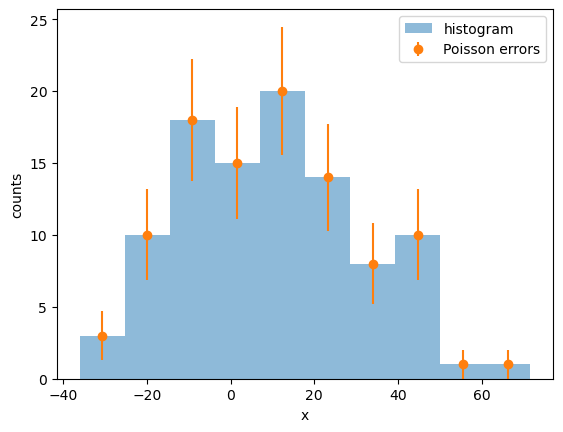

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#1 generate Normal distribution data
N=100         # O(100) as requested
mu=10         # choose mean
std=20        # choose standard deviation   #These parameters fully describe a normal (Gaussian) distribution(bill shape)
x= np.random.normal (loc=mu, scale=std, size=N)             #np.random.normal(loc, scale, size)
#STEP 2.1 — Create a histogram with NumPy
bins=10
count,edge= np.histogram(x,bins=bins)       #np.histogram(a, bins=10, range=None) 
#count → number of values in each bin      #edges → bin boundaries (length = bins + 1))
#2.2 Represent a histogram as data points with errors      (Compute bin centers and errors)
center= 0.5*(edge[:-1]+ edge[1:])
error= np.sqrt(count)      #Computed Poisson errors for each bin  (formula)   #error= np.sqrt(count)/N  (if nf y-axis is fraction / probability) not count
#2.3 Visualization
plt.figure()   #Creates a new figure   #plt.figure(figsize=(8,8)) 
plt.hist(x,bins=bins,alpha=0.5,label="histogram")   #label → text for the legend    #alpha=0.5 → makes bars semi-transparent
plt.errorbar(center,count,yerr=error,fmt='o',label="Poisson errors")   #plt.errorbar(x, y, yerr=None, xerr=None, fmt='')
plt.xlabel("x")
plt.ylabel("counts")
plt.legend()
plt.show()

C:\Users\hassa\AppData\Local\Temp\ipykernel_32256\3120613810.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  kde_area = np.trapz(kde_raw, grid)     #Computed the area under the raw KDE curve


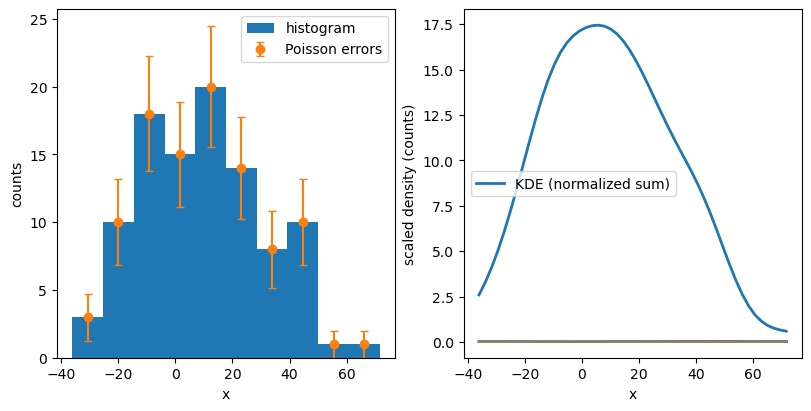

Bandwidth h = 9.094868330012256
Histogram area = 1076.1603946381647
KDE area (after scaling) = 1076.160394638165


C:\Users\hassa\AppData\Local\Temp\ipykernel_32256\3120613810.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print("KDE area (after scaling) =", np.trapz(kde, grid)


In [9]:
#3 Create gaussian curve
from scipy import stats
from matplotlib.ticker import MaxNLocator
bin_width = edge[1] - edge[0]
h = 1.06 * np.std(x) * (x.size ** (-1/5))   # h= Computed the bandwidth 
# Define evaluation grid
grid = np.linspace(edge[0], edge[-1])         #We need many points to draw smooth curves   #Created a fine x-grid where the KDE will be evaluated   
# build one Gaussian kernel per data point
kernels = np.array([stats.norm.pdf(grid, loc=xi, scale=h) for xi in x])   #For each data point we created one Gaussian kernel
# sum all kernels
kde_raw = np.sum(kernels, axis=0)   #This is the raw KDE, not normalized yet.
# normalize KDE so its integral matches histogram area
hist_area = np.sum(count) * bin_width   # area under histogram in "counts * x-units"
kde_area = np.trapz(kde_raw, grid)     #Computed the area under the raw KDE curve
kde = kde_raw * (hist_area / kde_area)
# 4) Plot: histogram + errors (left), kernels + KDE (right)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)

ax1.hist(x, bins=bins, label="histogram")    #What we did   Created two plots side by side Left → histogram + errors#Right → kernels + KDE
ax1.errorbar(center, count, yerr=error, fmt='o', capsize=3, label="Poisson errors")
ax1.set_xlabel("x")
ax1.set_ylabel("counts")
ax1.legend()
# Right: all kernels + final KDE
for k in kernels:
    ax2.plot(grid, k, alpha=0.15)

ax2.plot(grid, kde, linewidth=2, label="KDE (normalized sum)")
ax2.set_xlabel("x")
ax2.set_ylabel("scaled density (counts)")
ax2.legend()
plt.show()

print("Bandwidth h =", h)
print("Histogram area =", hist_area)
print("KDE area (after scaling) =", np.trapz(kde, grid)
)


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   139  100   139    0     0    413      0 --:--:-- --:--:-- --:--:--   423

100    17  100    17    0     0     20      0 --:--:-- --:--:-- --:--:--    20
100    17  100    17    0     0     20      0 --:--:-- --:--:-- --:--:--     0

100 43828  100 43828    0     0  30718      0  0:00:01  0:00:01 --:--:-- 30718


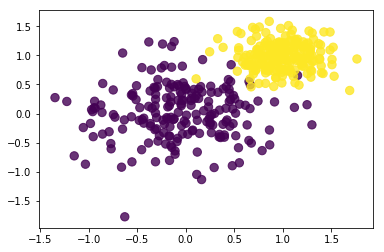

In [11]:
!curl -L -o two_categories_scatter_plot.png https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png

from IPython.display import Image
Image('two_categories_scatter_plot.png')

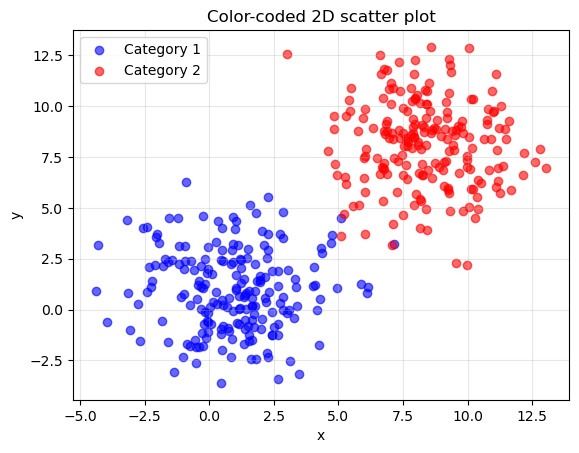

In [14]:
# 1) Function to generate a 2D dataset with 2 categories
def generate_2d_data(n):
#Generate two 2D Gaussian-distributed categories.
    # Category 1 parameters   # Define Gaussian parameters
    mean1 = 1
    std1 = 2
    # Category 2 parameters (different mean)
    mean2 = 8    # different mean separated will
    std2 = 2
    # Generate data
    data1 = np.random.normal(loc=mean1, scale=std1, size=(n,2))   #size=(n, 2) → (x, y) for each point
    data2 = np.random.normal(loc=mean2, scale=std2, size=(n,2))
    return data1, data2
# 2) Generate the data
data1, data2 = generate_2d_data(n=200)
# 3) Scatter plot with different colors
plt.figure()
plt.scatter(data1[:, 0], data1[:, 1], color='blue', alpha=0.6, label='Category 1')  #data1[:, 0] → x-coordinates
plt.scatter(data2[:, 0], data2[:, 1], color='red', alpha=0.6, label='Category 2')   #data1[:, 1] → y-coordinates
plt.xlabel("x")
plt.ylabel("y")
plt.title("Color-coded 2D scatter plot")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [13]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

'wget' is not recognized as an internal or external command,
operable program or batch file.


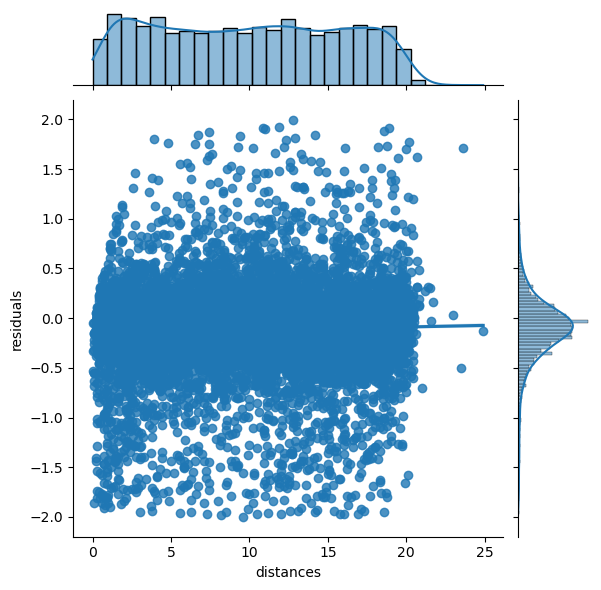

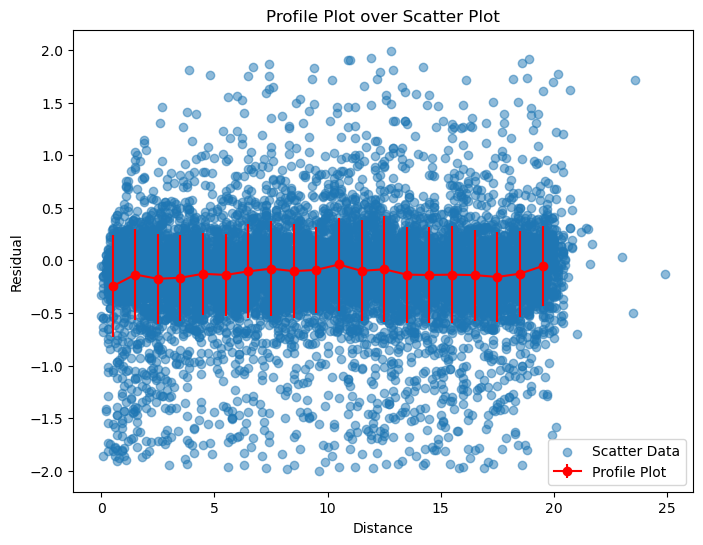

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

file_path = r"C:\Users\hassa\residuals_261.npy" 
data = np.load(file_path, allow_pickle=True).item() 
df = pd.DataFrame(data)

# Filter data|residuals| < 2
df_clean = df[np.abs(df["residuals"]) < 2]

#Linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_clean["distances"], df_clean["residuals"])

sns.jointplot(data=df_clean, x="distances", y="residuals", kind="reg") #graphic
plt.show()

#Statistic parameters
bins = np.linspace(0, 20, 21)  # 20 bins entre 0 y 20
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centros de los bins

#Mean and statistic deviation of bins
y_means = []
y_stds = []

for i in range(len(bins) - 1):
    mask = (df_clean["distances"] >= bins[i]) & (df_clean["distances"] < bins[i + 1])
    y_means.append(df_clean.loc[mask, "residuals"].mean())
    y_stds.append(df_clean.loc[mask, "residuals"].std())

bin_centers = np.array(bin_centers)
y_means = np.array(y_means)
y_stds = np.array(y_stds)

#Plots
plt.figure(figsize=(8, 6))
plt.scatter(df_clean["distances"], df_clean["residuals"], alpha=0.5, label="Scatter Data")
plt.errorbar(bin_centers, y_means, yerr=y_stds, fmt="o-", color="red", label="Profile Plot")
plt.xlabel("Distance")
plt.ylabel("Residual")
plt.title("Profile Plot over Scatter Plot")
plt.legend()
plt.show()
